<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/3_RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [48]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [2]:
oli = fetch_olivetti_faces()
X = oli.data
y = oli.target
X.shape, y.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


((400, 4096), (400,))

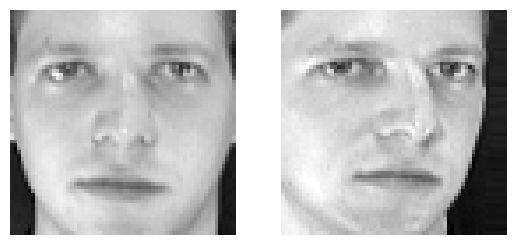

In [10]:
plt.figure()
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(oli.images[i], cmap="gray")
  plt.axis("off")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9375

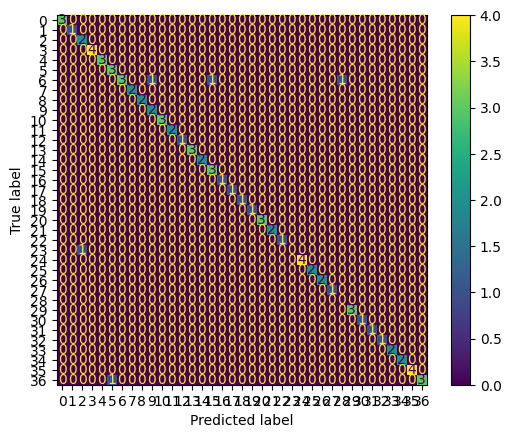

In [46]:
y_pred = rf_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

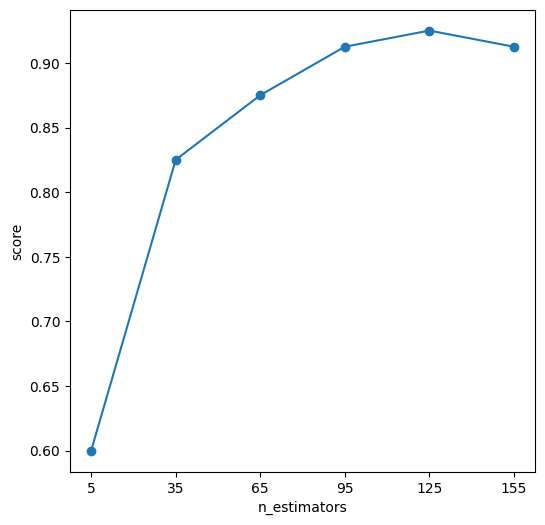

In [58]:
estimator_values = np.arange(5,156,30)
scores = []
for n in estimator_values:
  rf_clf = RandomForestClassifier(n_estimators = n, random_state=42)
  rf_clf.fit(X_train, y_train)
  score = rf_clf.score(X_test, y_test)
  scores.append(score)

plt.figure(figsize=(6,6))
plt.plot(estimator_values, scores, marker="o")
plt.xticks(estimator_values)
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.show()

## Regression

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [62]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
X.shape, y.shape

((20640, 8), (20640,))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test,y_pred))

(0.2553684927247781, 0.5053399773665033)

In [69]:
estimator_values = np.arange(5,181,30)
rmse_scores = []
for n in estimator_values:
  rf_reg = RandomForestRegressor(n_estimators=n, random_state=42)
  rf_reg.fit(X_train, y_train)
  y_pred = rf_reg.predict(X_test)
  rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

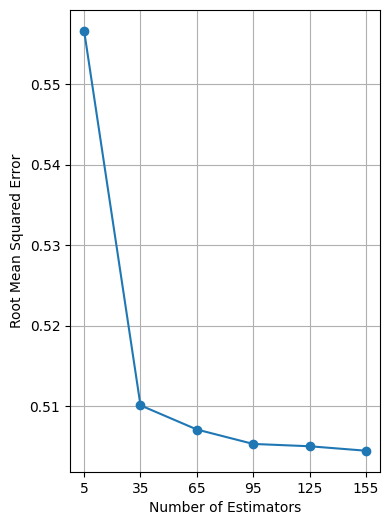

In [70]:
plt.figure(figsize=(4,6))
plt.plot(estimator_values, rmse_scores, marker="o")
plt.xlabel("Number of Estimators")
plt.ylabel("Root Mean Squared Error")
plt.xticks(estimator_values)
plt.grid(True)
plt.show()